<a href="https://colab.research.google.com/github/paualba2019/07MBIG-Visualizacion-Actividades-Guiadas/blob/master/AG3_Pablo_Garcia_Visualizacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**AG3** - Python y Javascript

##Autor: Pablo García

Carga de datos y Visaulización del dataset Titanic

In [0]:
# Importamos modulos
import pandas as pd
import io
import requests
import seaborn as sns
import timeit
import matplotlib.pyplot as plt
import numpy as np

In [0]:
# Cargamos el data set de los pasajeros del Titanic
url="https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv"
s=requests.get(url).content
titanic=pd.read_csv(io.StringIO(s.decode('utf-8')))

In [0]:
# Mostramos las 10 primeras filas del Dataset Titanic
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [0]:
# Mostramos los campos y sus tipos de datos
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null object
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null object
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [0]:
# Mostrar valores estadísticos de variable cuantitativas
titanic.describe()

,survived,pclass,age,sibsp,parch,fare,class_num
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,2.308642
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.836071
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,2.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,3.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,3.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,3.000000


## Operaciones con columnas

In [0]:
# Renombramos la columna class a clase
titanic.rename(columns={'class': 'clase'},
inplace=True)
# Muestra los valores distintos para class (clase)
titanic.clase.unique()

array(['Third', 'First', 'Second'], dtype=object)

In [0]:
# Muestra los valores distintos para el campo pclass
titanic.pclass.unique()

array([3, 1, 2])

In [0]:
# Añadimos nuevas columnas: is_old, is_baby
# Creamos una función para añadir una nueva columna is_old, para pasajeros > 60 años
def is_old_func(row):
  return row['age'] > 60
titanic['is_old'] = titanic.apply(is_old_func, axis='columns')

# Otra forma de definir una nueva columna. Creamos la columna is_baby, para pasajeros < 15 años
titanic.eval ( ' is_baby = age< 15 ' , inplace = True)
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,clase,who,adult_male,deck,embark_town,alive,alone,is_old,is_baby
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,False,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,False,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,False,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,False,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,False,False
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True,False,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True,False,False
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False,False,True
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False,False,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False,False,True


In [0]:
#del titanic['class_num']
#titanic

In [0]:
# Creamos una función que crea una nueva columna "class_num" numérica, con valores Third:3,First:1,Second:2
# según el valor del campo clase.
def class_num_func(row):
  Clase={'Third':3,'First':1,'Second':2}
  return Clase[row.clase]
titanic['class_num'] = titanic.apply(class_num_func, axis='columns')

titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,clase,who,adult_male,deck,embark_town,alive,alone,is_old,is_baby,class_num
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,False,False,3
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,False,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,False,False,3
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,False,False,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,False,False,3
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True,False,False,3
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True,False,False,1
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False,False,True,3
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False,False,False,3
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False,False,True,2


In [0]:
# Cambiamos el formato númerio del campo class_num a float64
titanic["class_num"] = titanic.class_num.astype('float64')
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
clase          891 non-null object
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null object
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
is_old         891 non-null bool
is_baby        891 non-null bool
class_num      891 non-null float64
dtypes: bool(4), float64(3), int64(4), object(7)
memory usage: 101.1+ KB


##Consulta de datos con condiciones

In [0]:
# Consulta con condiciones. Pasajeros cuyo sexo sea "Mujer", su clase "First" o "Third", su edad > 45 años y que no hayan sobrevivido
titanic[(titanic.sex == 'female')
  & (titanic['clase'].isin(['First','Third']))
  & (titanic.age > 45 )
  & (titanic.survived == 0)]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,clase,who,adult_male,deck,embark_town,alive,alone,is_old,is_baby,class_num
132,0,3,female,47.0,1,0,14.5000,S,Third,woman,False,NaN,Southampton,no,False,False,False,3.0
177,0,1,female,50.0,0,0,28.7125,C,First,woman,False,C,Cherbourg,no,True,False,False,1.0
736,0,3,female,48.0,1,3,34.3750,S,Third,woman,False,NaN,Southampton,no,False,False,False,3.0


##Gráficos

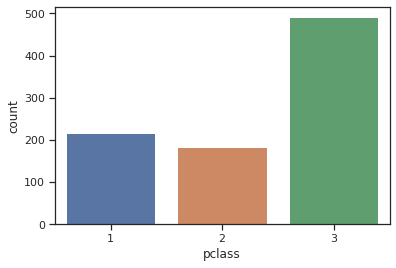

In [0]:
# Distribución de las clases
sns.countplot(x="pclass", data=titanic)

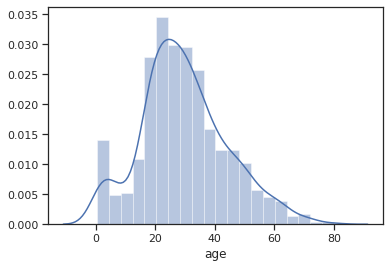

In [0]:
# Distribución de la edad (age)
sns.distplot(titanic.age.dropna( ))
plt.show( )

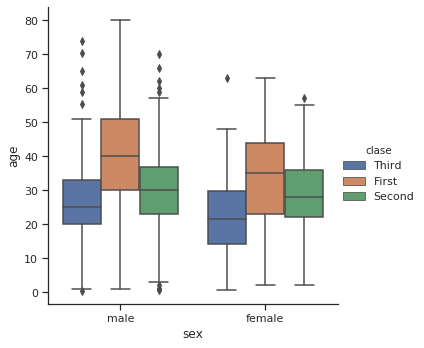

In [0]:
# BoxPlot de la edad por sexo y clase
with sns.axes_style(style='ticks'):
  ax = sns.catplot("sex", "age", "clase" ,
data=titanic, kind="box")

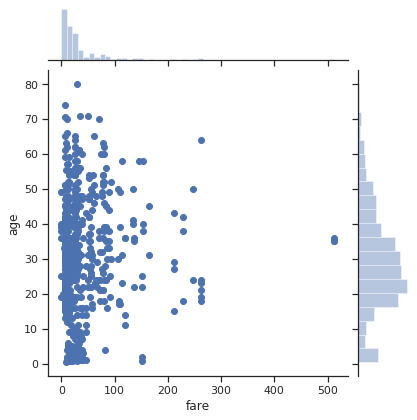

In [0]:
# Distribución cruzada de Edad y Tarifa
sns.jointplot(x='fare',y='age',data=titanic)

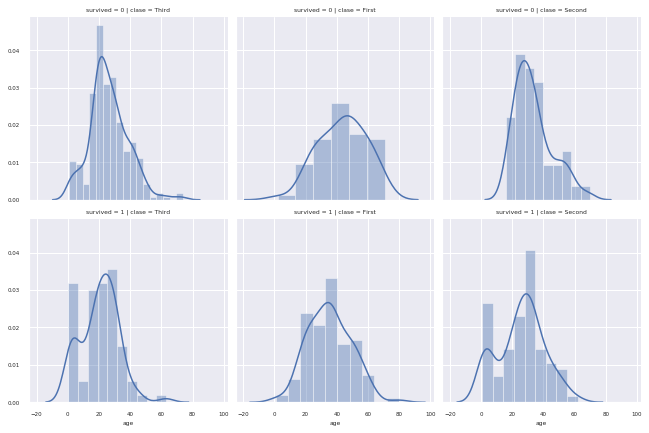

In [0]:
# Cambiamos el font
sns.set(font_scale=0.5)
# Distribución de la edad según la categorías: survived, clase
g = sns.FacetGrid(titanic, row='survived',col='clase')
g.map(sns.distplot, "age")
plt.show()


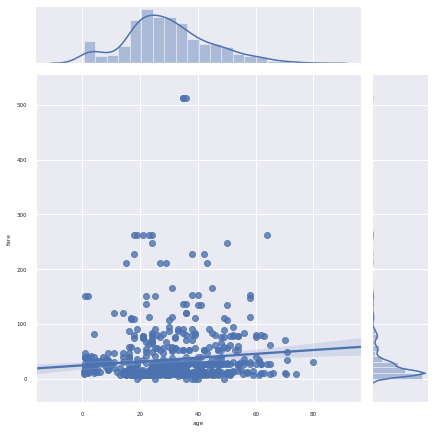

In [0]:
# Diagrama de dispersion con Distribucion de cada variable: fare(precio)/age(edad)
sns.jointplot(data=titanic, x='age', y='fare',kind='reg', color='b')
plt.show()


Text(0.5, 1, 'titanic.corr()')

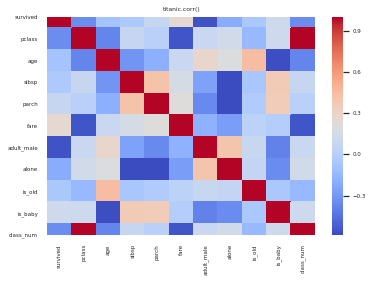

In [0]:
# Mapa de calor de correlaciones
tc = titanic.corr()
sns.heatmap(tc,cmap='coolwarm')
plt.title('titanic.corr()')

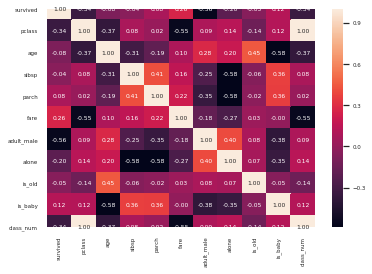

In [0]:
# Mapa de calor de correlaciones, motsrndo los valors de correlación
sns.heatmap(titanic.corr(), annot=True, fmt=".2f")
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


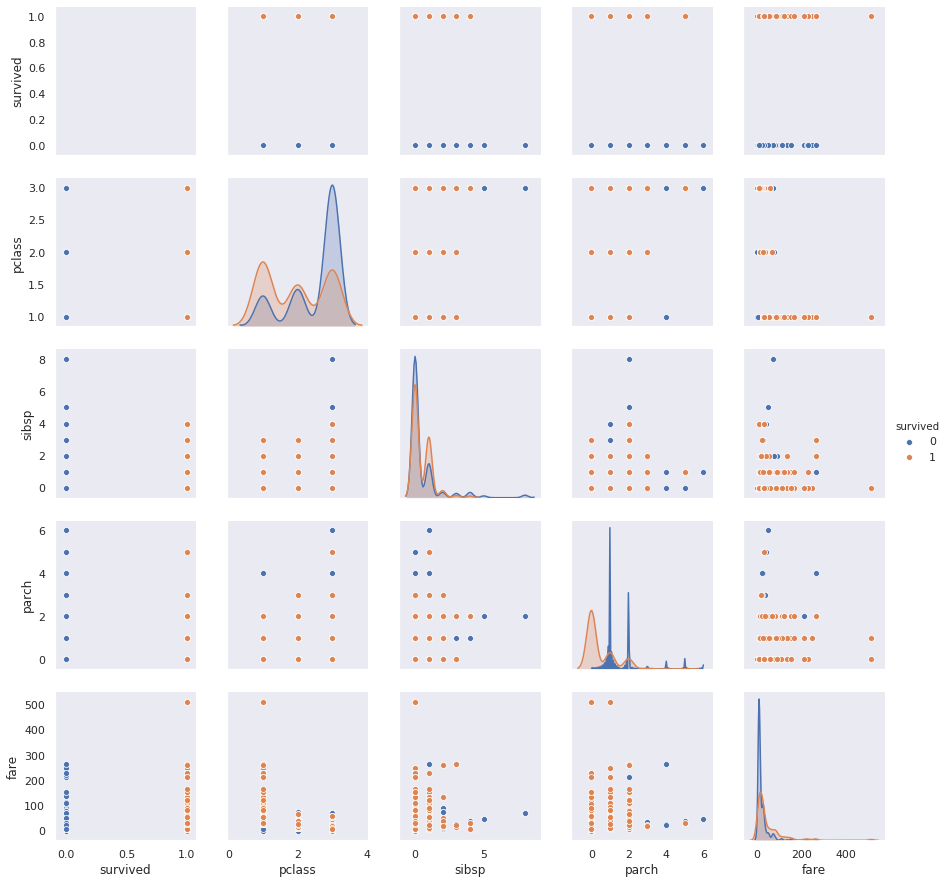

In [133]:
#Define un subconjuto de datos con las variables numéricas
titanic_num =titanic[['survived','pclass','sibsp','parch','fare']]
#Hace una matriz de diagramas de dispersión de parejas de variables.
sns.pairplot(titanic_num, hue="survived")
plt.show()

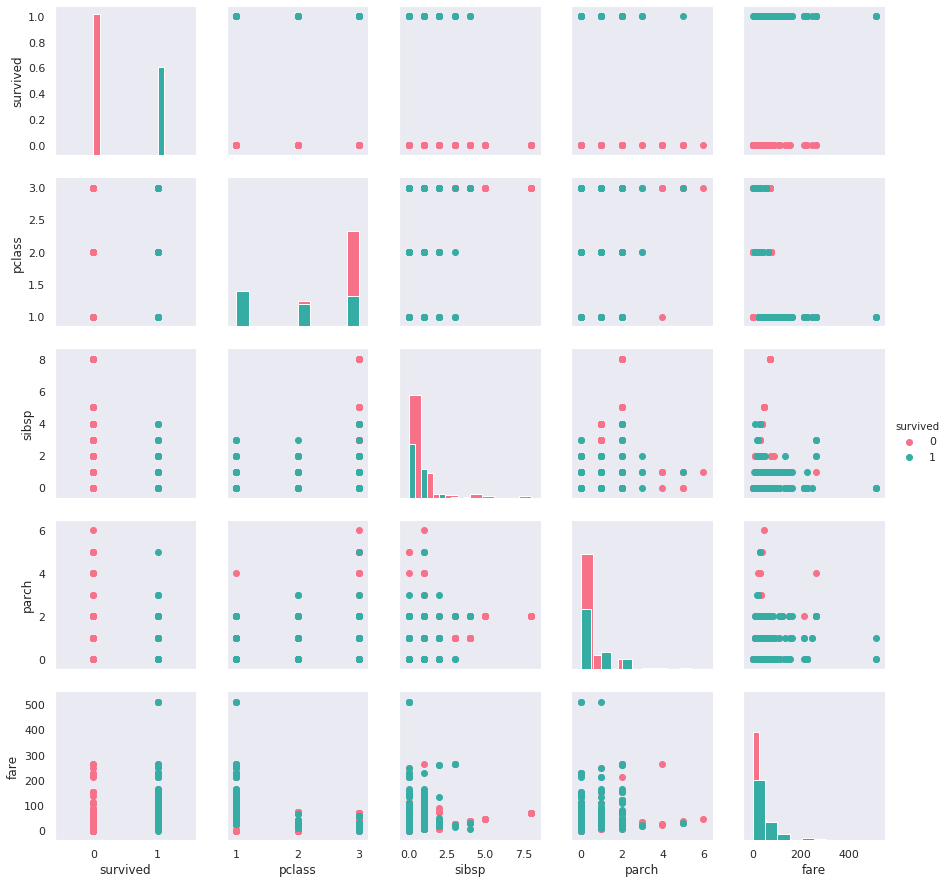

In [135]:
#Cambiamos el tipo de gráfico para que se parezca al gráfico de la presntación

#Define un subconjuto de datos con las variables numéricas (cuantitativas)
titanic_num = titanic[['survived','pclass','sibsp','parch','fare']]
#Hace una matriz de diagramas de dispersión de parejas de variables.
g = sns.PairGrid(titanic_num,hue="survived", palette="husl")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()

##Gráficos Dataset IRIS

In [121]:
df = sns.load_dataset("iris")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


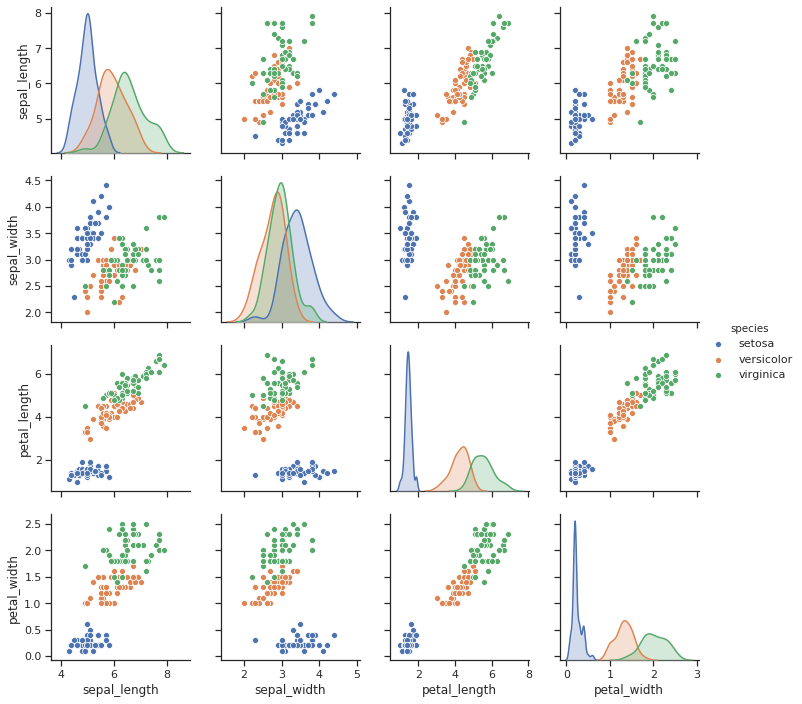

In [0]:
#Establece el estilo estético de las tramas
sns.set(style="ticks")
#Carga el data set
df = sns.load_dataset("iris")
#matriz de diagramas de dispersion
sns.pairplot(df, hue="species")

##Diferentes formatos de gráfico del Dataset IRIS

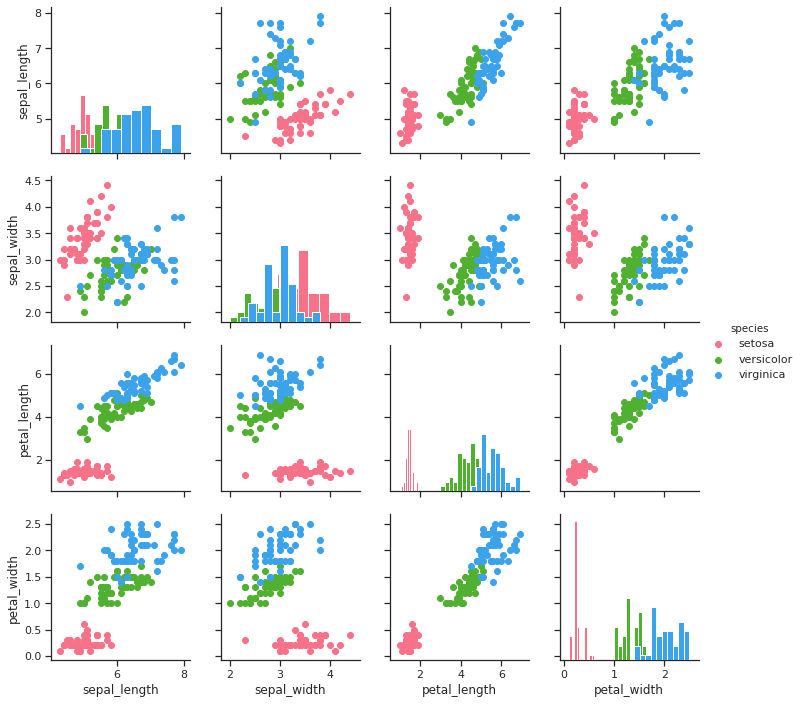

In [0]:
g = sns.PairGrid(df,hue="species", palette="husl")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()

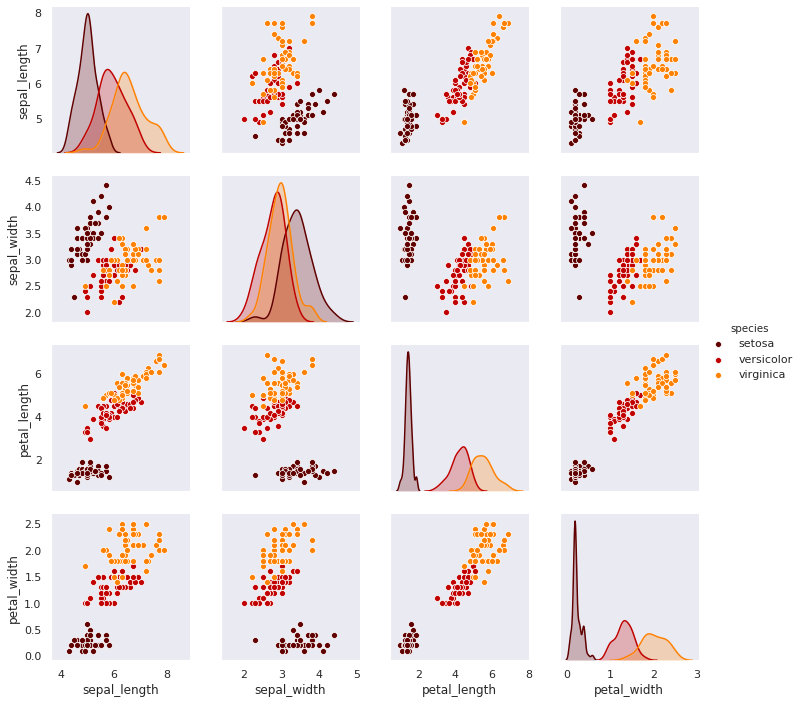

In [0]:
df = sns.load_dataset('iris') # temporarily using a different dataset for this one
sns.pairplot(df, palette='Blues', hue='species')
sns.plt.show()

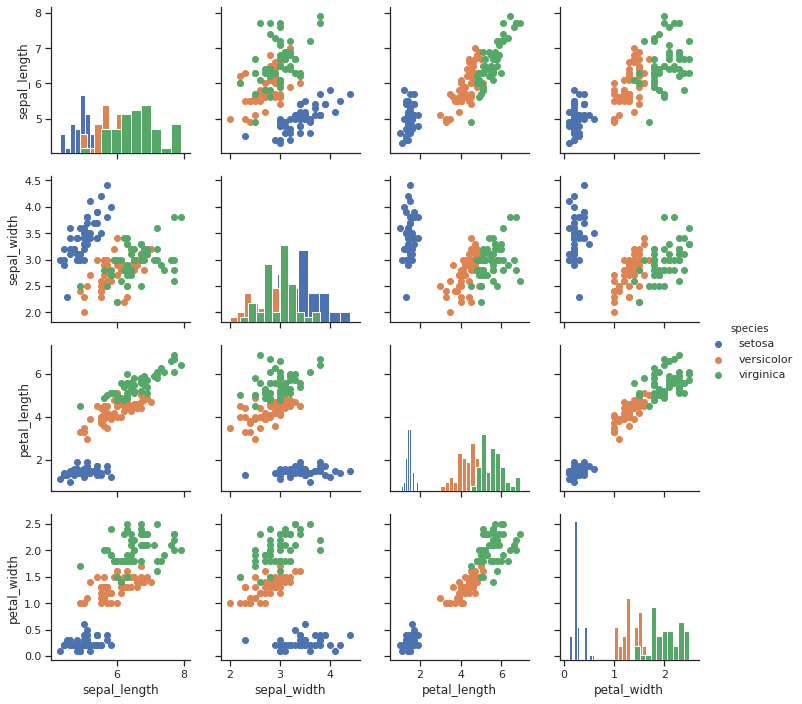

In [0]:
g = sns.PairGrid(df, hue="species")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()

###Python. Ampliación de la Práctica (10/10)

Diagramas de distribución de clase/edad y supervivientes

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


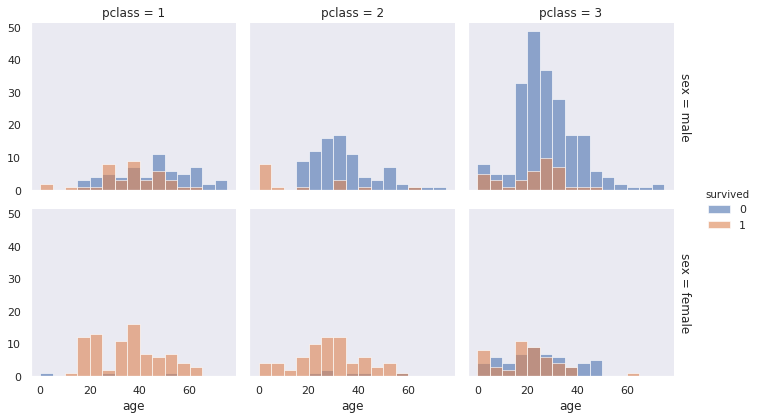

In [131]:
# Diagramas de distribución de clase/edad y supervivientes
import numpy as np
bins = np.arange(0, 80, 5)
g = sns.FacetGrid(titanic, row='sex', col='pclass', hue='survived', margin_titles=True, size=3, aspect=1.1)
g.map(sns.distplot, 'age', kde=False, bins=bins, hist_kws=dict(alpha=0.6))
g.add_legend()  
plt.show() 